In [1]:
import os
import cv2
import numpy as np

# Process image

In [2]:
#Enhance contrast using CLAHE or Histogram Equalization.
def enhance_contrast(image, method="clahe"):
    if method == "hist_eq":
        return cv2.equalizeHist(image)
    elif method == "clahe":
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        return clahe.apply(image)
    else:
        raise ValueError("Invalid method. Use 'hist_eq' or 'clahe'.")

#Preprocess images: enhance contrast, resize, normalize, convert to 3-channel RGB, and save as .npy.
def preprocess_images(image_dir, output_dir, target_size=(512, 512), contrast_method="clahe"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for image_file in os.listdir(image_dir):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            # Load the image in grayscale
            image_path = os.path.join(image_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Skipping {image_file}: Unable to load.")
                continue

            # Enhance contrast
            image = enhance_contrast(image, method=contrast_method)
            
            # Resize the image
            image = cv2.resize(image, target_size)
            
            # Convert grayscale to 3-channel RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Shape: (512, 512, 3)
            
            # Normalize the image (scale pixel values to [0, 1])
            image_rgb = image_rgb.astype(np.float32) / 255.0  
            
            # Save the preprocessed image as a .npy file
            np.save(os.path.join(output_dir, image_file.replace('.jpg', '.npy').replace('.png', '.npy')), image_rgb)

preprocess_images('C:/ML_Data/0_data_pretrain_train/image', 'C:/ML_Data/0_data_pretrain_train/image_preprocess', contrast_method="clahe")


# Display Processed image

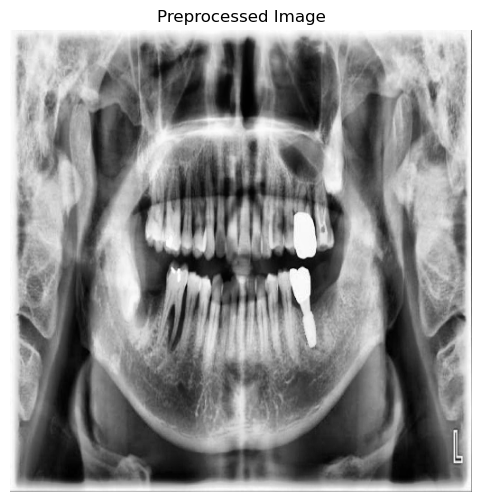

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed image from .npy file
image_path = "C:/ML_Data/0_data_pretrain_train/image_preprocess/0759.npy"  # Replace with an actual filename
image = np.load(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Since it's RGB, no need for cmap='gray'
plt.axis("off")  # Hide axes
plt.title("Preprocessed Image")
plt.show()

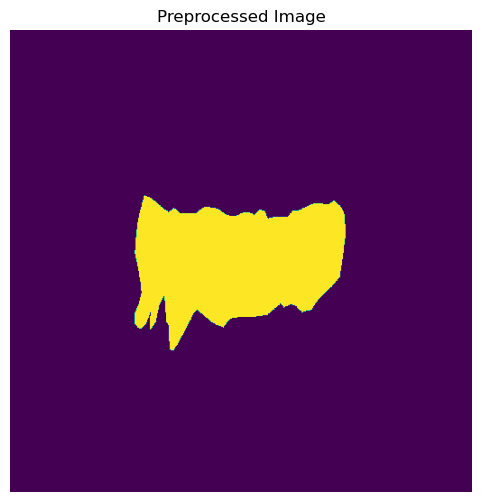

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed image from .npy file
image_path = "C:/ML_Data/0_data_pretrain_train/label_preprocess/0759.npy"  # Replace with an actual filename
image = np.load(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Since it's RGB, no need for cmap='gray'
plt.axis("off")  # Hide axes
plt.title("Preprocessed Image")
plt.show()